In [1]:
import datetime
import matplotlib.pyplot as plt 
import pylab
import yfinance as yf
yf.pdr_override()
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr 
plt.style.use('ggplot')
import sys
import warnings
%matplotlib inline 

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/Jupyter/Shasta.csv", index_col = "Date", parse_dates = True,
                 na_values=['nan'])
df = df["Close"]
df = pd.DataFrame(df)
#print(df)
df1 = df['Close']
df1 = pd.DataFrame(df1)

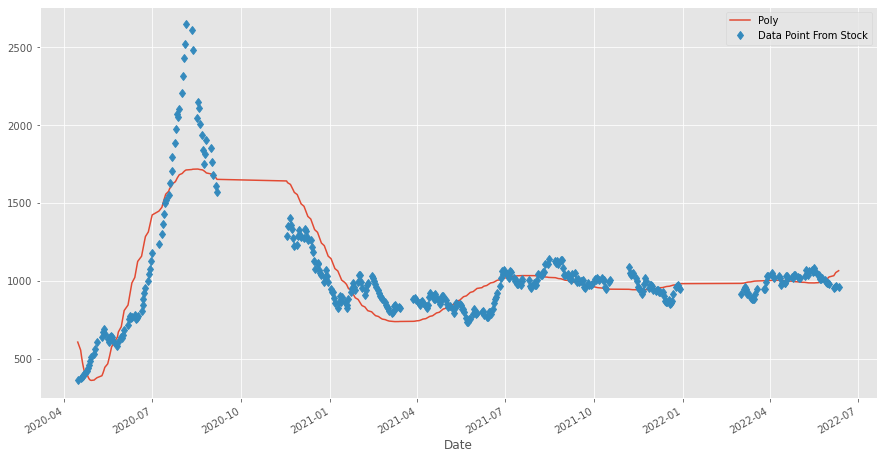

In [3]:
reg = np.polyfit(np.arange(len(df)),df['Close'].values,deg=8)
Quad = np.polyval(reg,np.arange(len(df)))
df['Poly'] = Quad

df['Poly'].plot(figsize = (15,8))
pylab.plot(df['Close'],'d',label = 'Data Point From Stock')
pylab.legend()
plt.show()

## Interpolation

In [4]:
x = np.arange(len(df))
y = np.array(df['Close'].tolist())
y1 = interp1d(x,y,kind = 'quadratic')

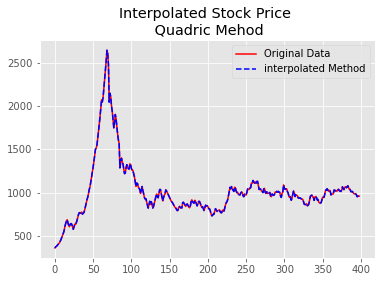

In [5]:
pylab.plot(figsize = (10,8))
pylab.plot(x,y, 'r', label = "Original Data")
pylab.plot(x,y1(x), 'b--', label = "interpolated Method")
pylab.title("Interpolated Stock Price \n Quadric Mehod")
pylab.legend(loc = 'best')
pylab.show()

## Linear Regression

In [6]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
forecast_out = int(2)
df1['Prediction'] = df1['Close'].shift(-forecast_out)
print(df1)

             Close  Prediction
Date                          
2020-04-15  363.58      381.64
2020-04-18  375.80      391.87
2020-04-19  381.64      400.92
2020-04-20  391.87      411.02
2020-04-21  400.92      423.30
...            ...         ...
2022-06-01  982.00      957.00
2022-06-06  956.00      965.00
2022-06-07  957.00      961.00
2022-06-08  965.00         NaN
2022-06-11  961.00         NaN

[399 rows x 2 columns]


In [8]:
X = np.array(df1.drop(['Prediction'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

In [9]:
y = np.array(df1['Prediction'])
y = y[:-forecast_out]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
#Testing
confidence = clf.score(X_test,y_test)
print("confidence:", confidence)

confidence: 0.9726201705942252


In [12]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[970.25688989 966.39328727]


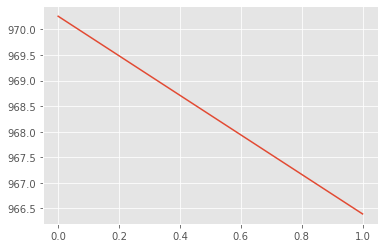

In [13]:
plt.plot(forecast_prediction)

In [14]:
DRT = df.pct_change()*100

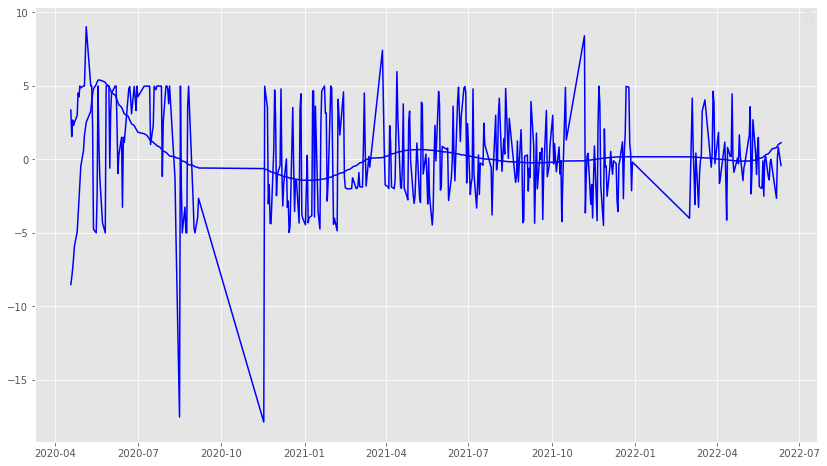

In [15]:
plt.figure(figsize=(14,8))
plt.legend(DRT)
plt.plot(DRT,'b')
plt.show()